In [328]:
import os
import csv
import pandas as pd
import plotly.express as px
#import plotly.io as pio
import matplotlib.pyplot as plt
file_to_load = "Asteroid_dates.csv"
asteroid_data= pd.read_csv(file_to_load)

In [329]:
asteroid_data.head()

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.2,8.368577,1/01/2019,0.085909,0.038420,False,19108365.54,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.7,6.461135,1/01/2019,0.043057,0.019256,False,17987605.96,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.429487,1/01/2019,0.622358,0.278327,True,11440989.54,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.2,11.718652,1/01/2019,0.085909,0.038420,False,10220722.30,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.8,13.642474,1/01/2019,0.411188,0.183889,False,70335665.49,Earth


In [330]:
# Max size {diameter}
orbit_body_max = asteroid_data["Miss Distance (km)"].max()
orbit_body_min = asteroid_data["Miss Distance (km)"].min()
orbit_body_min
#so the closest and asteroid came to earth is still pretty far away... it is the equivalent distance of if you walked around earth's circumference   

12613.43417

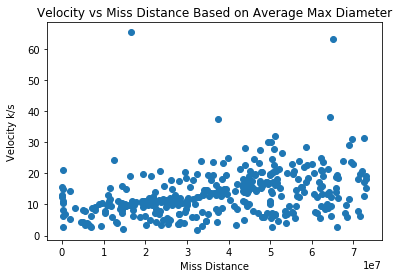

In [331]:
average_vel = asteroid_data.groupby(["Estimated Max Diameter"]).mean()["Relative Velocity (k/s)"]
average_dist = asteroid_data.groupby(["Estimated Max Diameter"]).mean()["Miss Distance (km)"]
fig,scatterplt = plt.subplots()
scatterplt.scatter(average_dist,average_vel)

#remove_large_outlier.set_index('Miss Distance (km)')['Relative Velocity (k/s)'].plt.scatter();
#label the y axis
plt.ylabel("Velocity k/s", labelpad=10)
plt.xlabel("Miss Distance")
#label the graph 
plt.title("Velocity vs Miss Distance Based on Average Max Diameter")
plt.show()

Based on the average max diameter the missed distance and velocity do not seem to have any correaltion, there are some outliers where the velocity is much higher but these do not seem to have a relationship either. 

In [332]:
#what is the max velocity to test if I have plotted the data above correctly
max_vel = asteroid_data["Relative Velocity (k/s)"].max()
max_vel

65.46911977

In [333]:
#find how many unique asteroids in total 
count = asteroid_data["Name"].nunique()
count

4510

In [334]:
#find the max diameter of max diameter 
max_dia = asteroid_data["Estimated Max Diameter"].max()
max_dia

49.43561926

In [335]:
#find the average diameter of max diameter
mean_dia = asteroid_data["Estimated Max Diameter"].mean()
mean_dia

0.28243774193543447

In [336]:
#max magniutde 
mag_max = asteroid_data["Absolute Magnitude"].max()
mag_max

32.3

In [337]:
#Count on the ID make sure is same as Name
count_asteroid = asteroid_data["ID"].nunique()
count_asteroid

4510

In [338]:
#Average speed {relative velocity} kilometers per second
av_speed = asteroid_data["Relative Velocity (k/s)"].mean()
av_speed

12.882851471341697

In [339]:
#clean the data to get a smaller data source to plot, remove larger outliers and smaller outliers too 
remove_large_outlier = asteroid_data.loc[asteroid_data["Estimated Max Diameter"]<6,:]
remove_small_outliers = remove_large_outlier.loc[remove_large_outlier["Estimated Max Diameter"]>=0.04,:]
# (dont use)remove_days = remove_small_outliers.loc[remove_small_outliers["Day"]<2,:]
# (dont use)remove_days

In [342]:
#plot the pylot scatter using cleaned data for dia and miss dist by month and day
fig4=px.scatter(remove_small_outliers, y="Estimated Max Diameter", x="Miss Distance (km)", animation_frame="Month", animation_group="Day",
           size="Estimated Max Diameter", color="Day", hover_name="Date",
           log_x=True, size_max=65, range_x=[1000000,100000000], range_y=[-0.8,4],title="Miss Distance vs Estimated Max Diameter by Day and Month for Sample Data")
#fig4.write_html("Miss Distance vs Estimated Max Diameter by Day and Month for Sample Data.html")
#fig4.write_image("Miss Distance vs Estimated Max Diameter by Day and Month for Sample Data.png")
#fig4

In [343]:
#grouped by month, scatter plot for dia and miss dist, by abs magnitude
fig3 = px.scatter(remove_small_outliers, y="Estimated Max Diameter", x="Miss Distance (km)", animation_frame="Month", animation_group="Day",
           size="Estimated Max Diameter", color="Absolute Magnitude", hover_name="Date",
           log_x=True, size_max=120, range_x=[1000600,100000000], range_y=[-0.5,2],title="Miss Distance vs Estimated Max Diameter by Absolute Magnitude and Month for Sample Data")
#fig3.write_html("Miss Distance vs Estimated Max Diameter by Absolute Magnitude and Month for Sample Data.html")
#fig3.write_image("Miss Distance vs Estimated Max Diameter by Absolute Magnitude and Month for Sample Data.png")
#fig3

In [344]:
#how many records of one asteroid using groupby(dont use - not needed)
# group_name = asteroid_data.groupby("Name")
# group_name.head()


In [345]:
#how many records of one asteroid & find the names of the asteroids 
find_uni = asteroid_data["Name"].value_counts()
find_uni

(2020 CD3)           5
(2006 SC)            3
(2018 FG1)           3
325395 (2009 CQ5)    3
528859 (2009 CR5)    3
                    ..
(2012 UV136)         1
(2016 DU1)           1
(2017 UF1)           1
(2019 OM3)           1
(2019 TV6)           1
Name: Name, Length: 4510, dtype: int64

Of the asteroids (2020 CD3) is the one with the most data for the year 2019, I will use this data to plot and find realtionships

In [346]:
#use the asteroid with the most records and plot the yearly data to see how it has moved, print Df to see what data we can play with
date_find = asteroid_data.loc[asteroid_data["Name"]=="(2020 CD3)"]
date_find

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
242,16/01/2019,Jan,16,54000953,(2020 CD3),31.672,2.132636,16/01/2019,0.002752,0.001231,False,162325.86620,Earth
1234,4/04/2019,Apr,4,54000953,(2020 CD3),31.672,7.768625,4/04/2019,0.002752,0.001231,False,13121.45357,Earth
2334,30/06/2019,Jun,30,54000953,(2020 CD3),31.672,1.556539,30/06/2019,0.002752,0.001231,False,276852.46040,Earth
3250,10/09/2019,Sep,10,54000953,(2020 CD3),31.672,1.471872,10/09/2019,0.002752,0.001231,False,301933.12670,Earth
4497,18/11/2019,Nov,18,54000953,(2020 CD3),31.672,1.540805,18/11/2019,0.002752,0.001231,False,289677.11180,Earth


In [347]:
# (dont use)new_date = date_find.loc[:,"Date"]
# (dont use)new_date

In [348]:
#need to sort the data by date,convert date to datetime to be able to sort the values
date_find["New Date"] = pd.to_datetime(date_find["Date"])
date_find.sort_values(by=["New Date"])

C:\Users\bonna\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body,New Date
242,16/01/2019,Jan,16,54000953,(2020 CD3),31.672,2.132636,16/01/2019,0.002752,0.001231,False,162325.86620,Earth,2019-01-16
1234,4/04/2019,Apr,4,54000953,(2020 CD3),31.672,7.768625,4/04/2019,0.002752,0.001231,False,13121.45357,Earth,2019-04-04
2334,30/06/2019,Jun,30,54000953,(2020 CD3),31.672,1.556539,30/06/2019,0.002752,0.001231,False,276852.46040,Earth,2019-06-30
3250,10/09/2019,Sep,10,54000953,(2020 CD3),31.672,1.471872,10/09/2019,0.002752,0.001231,False,301933.12670,Earth,2019-10-09
4497,18/11/2019,Nov,18,54000953,(2020 CD3),31.672,1.540805,18/11/2019,0.002752,0.001231,False,289677.11180,Earth,2019-11-18


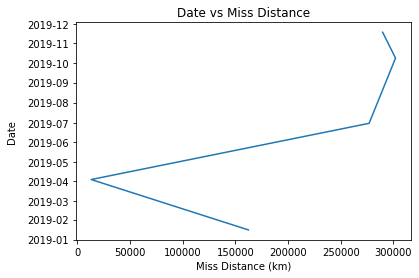

In [349]:
#plot this asteroid 2020 CD3 (line chart on change in miss distance per month OR relative velocity vs miss distance) to see if and correlation

#plot the line graph 
date_find.set_index('Miss Distance (km)')['New Date'].plot();
#label the y axis
plt.ylabel("Date", labelpad=10)

#label the graph 
plt.title("Date vs Miss Distance")
plt.show()
#plt.savefig("Date vs Miss Distance")

Observation: The data in which I have plotted for date vs miss distance shows how the asteroid travelled through the year, we have an outlier that ends up being much closer to Earth in April and then goes right back out further in the following months. 

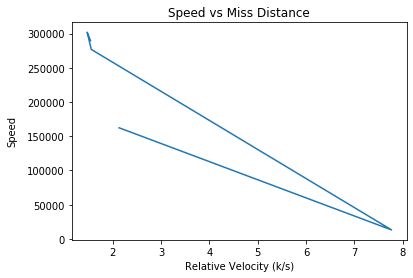

In [350]:
#plot this asteroid 2020 CD3,Miss distance distance vs velocity to see if and correlation

#plot the line graph 
date_find.set_index('Relative Velocity (k/s)')['Miss Distance (km)'].plot();
#label the y axis
plt.ylabel("Miss Distance", labelpad=10)

#label the graph 
plt.title("Speed vs Miss Distance")
plt.show()
#plt.savefig("Speed vs Miss Distance")

Observation: There is no correaltion between miss distance and speed

In [351]:
#I am replotting using a scatter plot to see if the data from above line graphs is more user readable
fig2=px.scatter(date_find, y="Relative Velocity (k/s)", x="Miss Distance (km)",animation_group="Month",
           size="Relative Velocity (k/s)", color="Month", hover_name="Date",
           log_x=True, size_max=45, range_x=[10000,400000], range_y=[1,9],title="Relative Velocity vs Miss Distance by Date for Asteroid 2020 CD3")
#fig2.write_html("Relative Velocity vs Miss Distance by Date for Asteroid 2020 CD3.html")
#fig2.write_image("Relative Velocity vs Miss Distance by Date for Asteroid 2020 CD3.png")
#fig2

Conclusion: What we found was there is a correlation between relative velocity of an asteroid and how close it got to the Earth

In [352]:
#I am replotting using a scatter plot to see if the data from above line graphs is more user readable
fig=px.scatter(date_find, y="Date", x="Miss Distance (km)",animation_group="Month",
           size="Miss Distance (km)", color="Month", hover_name="Date",
           log_x=True, size_max=45, range_x=[10000,400000], range_y=["Jan","Dec"],title="Date vs Miss Distance for Asteroid by Date 2020 CD3")
#fig.write_html("Date vs Miss Distance for Asteroid by Date 2020 CD3.html")
#fig.write_image("Date vs Miss Distance for Asteroid by Date 2020 CD3.png")
#fig

Observation: The data in which I have plotted for date vs miss distance shows an outlier that ends up being much closer to Earth in April and then goes right back out to where the other data points lie in the following months. 